In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from scipy import stats


In [3]:
df=pd.read_csv('C:/Users/rajat/Desktop/robin 1/test_scores.csv')
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [4]:
df.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [5]:
df.shape

(2133, 11)

In [6]:
df['school'].unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [7]:
df['school'].nunique()

23

<AxesSubplot:xlabel='school', ylabel='posttest'>

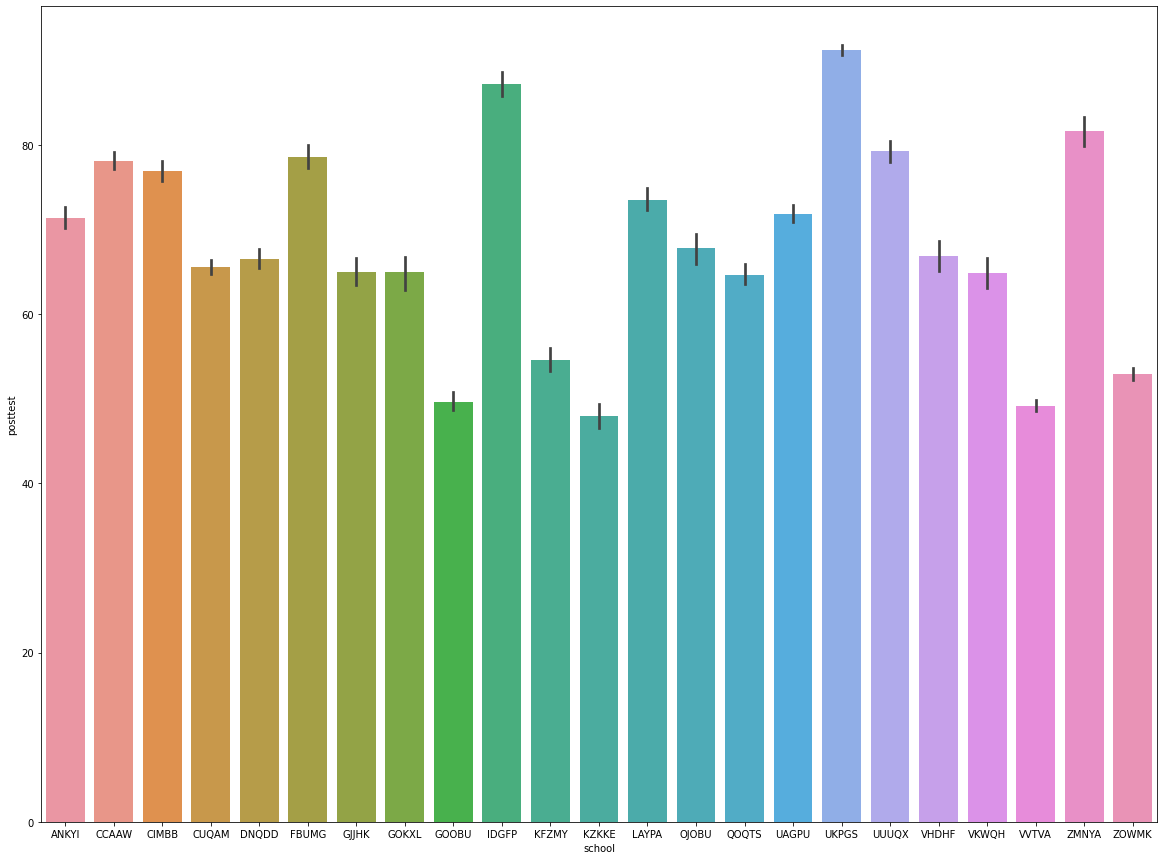

In [8]:
plt.figure(figsize=(20,15))
sns.barplot(x=df['school'],y=df['posttest'])

In [9]:
for i in df['school'].unique():
    print(np.std(df[df['school']==i]['posttest']))

3.9067049854001805
5.1657649496003
5.518744206674176
4.438947357944975
6.508490929469299
4.7203456987881784
8.77058050801499
7.983243559755333
6.6062156036437845
7.40780820847833
4.8964121631053406
7.2796583613718235
5.096000519903937
8.050935243749
7.161083260468173
4.827613574087727
3.4021531411877612
6.065356440707707
6.536091501686309
9.571185924429638
3.4111417392902132
7.6938096541524175
4.338227819639303


In [10]:
x=df['school'].value_counts().sort_values(ascending=False)

In [11]:
x

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [12]:
type(x)

pandas.core.series.Series

In [13]:
y=[]
for i in x.index:
    y.append(df[df['school']==i]['posttest'].mean())

In [14]:
y

[49.61392405063291,
 64.67114093959732,
 91.1640625,
 66.56557377049181,
 65.02542372881356,
 52.9059829059829,
 49.175438596491226,
 47.91891891891892,
 78.11009174311927,
 65.5607476635514,
 64.82,
 87.22340425531915,
 71.8735632183908,
 79.26190476190476,
 67.81481481481481,
 76.94594594594595,
 81.6086956521739,
 64.953125,
 73.50877192982456,
 54.57692307692308,
 66.84313725490196,
 78.6086956521739,
 71.39024390243902]

In [15]:
print('max of y -> ',max(y),'min of y -> ',min(y))

max of y ->  91.1640625 min of y ->  47.91891891891892


<AxesSubplot:>

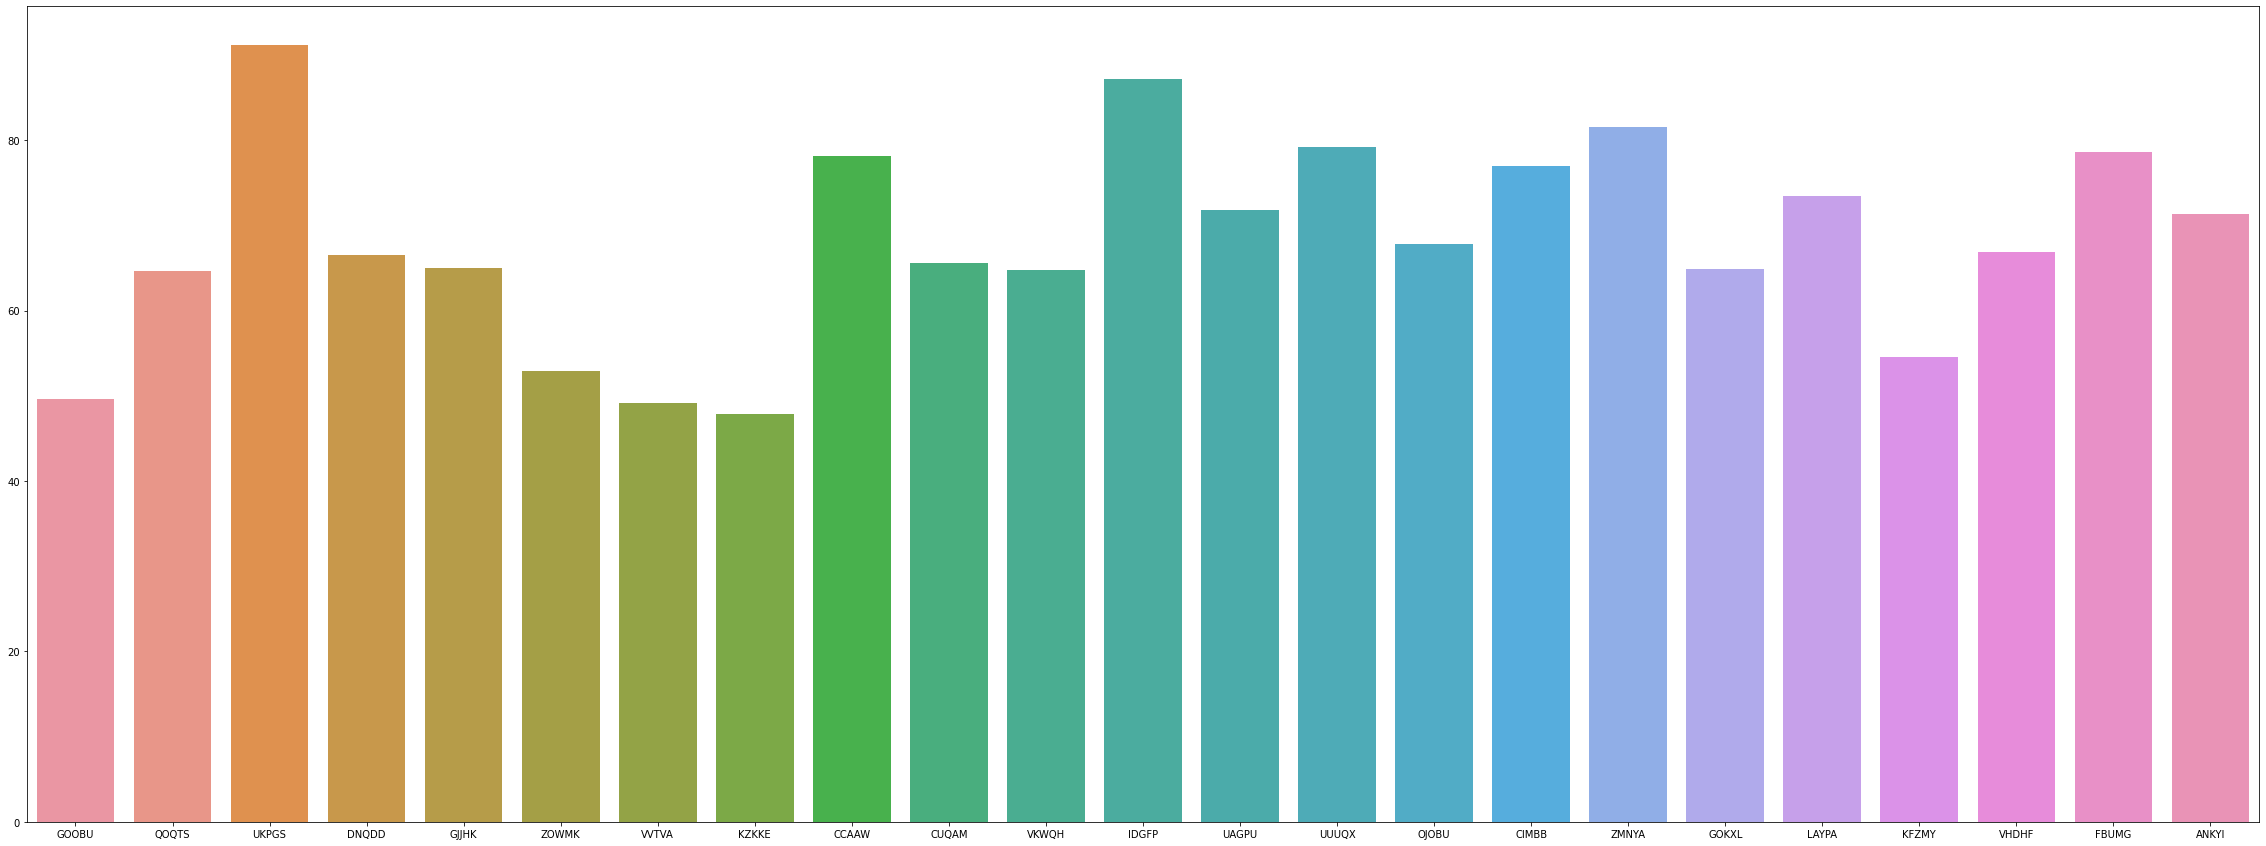

In [16]:
plt.figure(figsize=(40,15))
sns.barplot(x=x.index,y=y)

In [17]:
df['school'].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [18]:
df['school'].nunique()

23

In [19]:
df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000



## 1. There total of 23 school ranging from 41 to 158 students.
## 2. not o much Difference in average marks of school'
## 3. no. of students in school does not affect the performance of school.
## 5. variance of all schools are almost same raging drom 4 to 9.
## 4. there is signifiant effect of school on marks



In [20]:
df['school_setting'].value_counts()

Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64

<AxesSubplot:xlabel='school_setting', ylabel='posttest'>

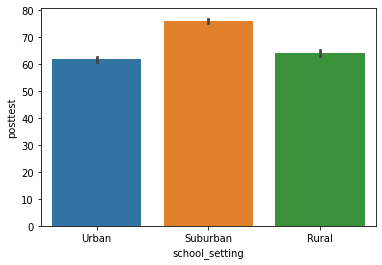

In [21]:
sns.barplot(x=df['school_setting'],y=df['posttest'])

In [22]:
print('VARIANCE')
for i in df['school_setting'].unique():
    print(i,' -> ',np.std(df[df['school_setting']==i]['posttest']))

VARIANCE
Urban  ->  13.58891179414152
Suburban  ->  11.038918300427465
Rural  ->  12.081964723829103


In [23]:
print('MEAN')
for i in df['school_setting'].unique():
    print(i,' -> ',np.mean(df[df['school_setting']==i]['posttest']))

MEAN
Urban  ->  61.74834437086093
Suburban  ->  76.0376569037657
Rural  ->  64.05098039215686


## 1. school setting does not seem to affect our data
## 2. variance and means are almost equal. sub-urban has slightly greater mean than rest of categories. 
## 3. may or may not neglect during modelling.

In [24]:
df['school_type'].value_counts()

Public        1582
Non-public     551
Name: school_type, dtype: int64

<AxesSubplot:xlabel='school_type', ylabel='posttest'>

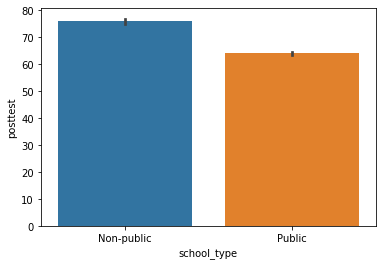

In [25]:
sns.barplot(x=df['school_type'],y=df['posttest'])

In [26]:
print('VARIANCE')
for i in df['school_type'].unique():
    print(i,' -> ',np.std(df[df['school_type']==i]['posttest']))

VARIANCE
Non-public  ->  10.530243337624693
Public  ->  13.717199071775248


In [27]:
print('MEAN')
for i in df['school_type'].unique():
    print(i,' -> ',np.mean(df[df['school_type']==i]['posttest']))

MEAN
Non-public  ->  75.96188747731398
Public  ->  64.01643489254108


## 1. significant difference between means of two school types
## 2. variance is small for both.
## 3. may include in modelling.

In [28]:
from collections import defaultdict
d=defaultdict(set)
for i in df.index:
    d[df.loc[i,'classroom']].add(df.loc[i,'school'])
    


In [29]:
for i in d.values():
    print(len(i))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## SCHOOLS HAVE UNIQUE CLASSES.NO TWO SCHOOLS HAVE SAME CLASS ROOM

In [30]:
for i in df['school'].unique():
    print(i,' -->>')
    for j in df[df['school']==i]['classroom'].unique():
        print(np.mean(df[df['classroom']==j]['posttest']))
    print()


ANKYI  -->>
74.15
68.76190476190476

CCAAW  -->>
77.66666666666667
83.4
78.06666666666666
81.19047619047619
70.9375
75.63157894736842

CIMBB  -->>
70.10526315789474
78.0952380952381
82.58823529411765
77.52941176470588

CUQAM  -->>
67.03571428571429
60.81481481481482
64.89285714285714
69.95833333333333

DNQDD  -->>
60.96296296296296
59.25
73.42857142857143
68.45
69.07407407407408

FBUMG  -->>
77.92857142857143
82.05555555555556
74.85714285714286

GJJHK  -->>
57.63636363636363
78.22222222222223
66.04761904761905
55.76190476190476
64.25925925925925

GOKXL  -->>
70.0
69.3913043478261
53.73684210526316

GOOBU  -->>
56.03225806451613
43.791666666666664
41.035714285714285
50.416666666666664
48.92
56.5

IDGFP  -->>
83.36363636363636
92.04761904761905
83.41176470588235
98.41176470588235
78.88235294117646

KFZMY  -->>
57.592592592592595
51.32

KZKKE  -->>
57.65
40.5
44.0
55.0
43.869565217391305

LAYPA  -->>
71.57142857142857
69.94736842105263
79.88235294117646

OJOBU  -->>
78.41176470588235
57.7

## classes within school have average marks variances of 10-15

## classroom for a particular school has a significant impact on posttest scores

In [31]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [32]:
df['teaching_method'].value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

<AxesSubplot:xlabel='teaching_method', ylabel='posttest'>

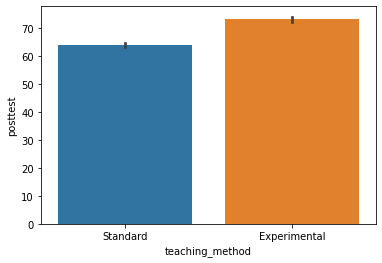

In [33]:
sns.barplot(x=df['teaching_method'],y=df['posttest'])

In [34]:
print('MEAN')
for i in df['teaching_method'].unique():
    print(np.mean(df[df['teaching_method']==i]['posttest']))

MEAN
63.84705025491624
72.9828947368421


In [35]:
print('std')
for i in df['teaching_method'].unique():
    print(np.std(df[df['teaching_method']==i]['posttest']))

std
13.030243283393558
13.72352847214454


## teaching_method has a significant impact on posttest therefore showing a marginal difference between means

In [36]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [37]:
df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


## corr_coef of target_var and n_student is -0.504(quite significant)
## corr_coef of target_var and pretest is 0.950(very significant)

In [38]:
df['gender'].value_counts()

Male      1077
Female    1056
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='posttest'>

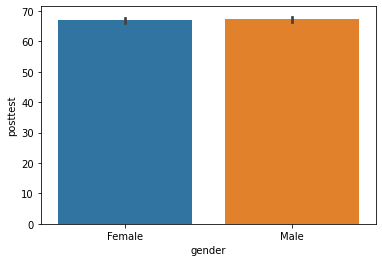

In [39]:
sns.barplot(x=df['gender'],y=df['posttest'])

In [40]:
np.mean(df[df['gender']=='Female']['posttest'])

67.00473484848484

## no difference on the basis of gender
## can neglect during modelling

In [41]:
df['lunch'].value_counts()

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

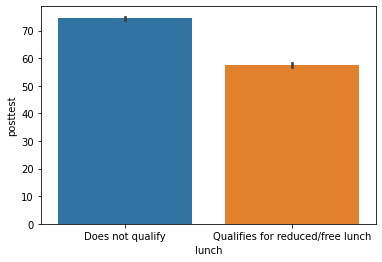

In [42]:
sns.barplot(x=df['lunch'],y=df['posttest'])

## luch is also significant

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [44]:
df['school'].dtype=='O'

True

In [45]:
categ_col=[]
for i in df.columns:
    if(df[i].dtype=='O'):
        categ_col.append(i)
categ_col

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'student_id',
 'gender',
 'lunch']

In [46]:
categ_col.pop(5)

'student_id'

In [47]:
categ_col.pop(5)

'gender'

In [48]:
categ_col

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'lunch']

In [49]:
num_col=['n_student','pretest']

In [50]:
df[num_col]

,n_student,pretest
0,20.0,62.0
1,20.0,66.0
2,20.0,64.0
3,20.0,61.0
4,20.0,64.0
...,...,...
2128,30.0,39.0
2129,30.0,38.0
2130,30.0,45.0
2131,30.0,46.0


In [51]:
target=df['posttest']

In [52]:
target

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64

In [53]:
df[categ_col]

,school,school_setting,school_type,classroom,teaching_method,lunch
0,ANKYI,Urban,Non-public,6OL,Standard,Does not qualify
1,ANKYI,Urban,Non-public,6OL,Standard,Does not qualify
2,ANKYI,Urban,Non-public,6OL,Standard,Does not qualify
3,ANKYI,Urban,Non-public,6OL,Standard,Does not qualify
4,ANKYI,Urban,Non-public,6OL,Standard,Does not qualify
...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,Does not qualify
2129,ZOWMK,Urban,Public,ZBH,Standard,Qualifies for reduced/free lunch
2130,ZOWMK,Urban,Public,ZBH,Standard,Qualifies for reduced/free lunch
2131,ZOWMK,Urban,Public,ZBH,Standard,Qualifies for reduced/free lunch


In [54]:
categ_df=pd.get_dummies(df[categ_col])

In [55]:
categ_df

,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,...,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Experimental,teaching_method_Standard,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [56]:
categ_df=categ_df.drop(columns=['school_ANKYI','classroom_ZNS','teaching_method_Standard','lunch_Does not qualify'],axis=1)

In [57]:
categ_df

,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,school_KFZMY,...,classroom_XXE,classroom_XXJ,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,teaching_method_Experimental,lunch_Qualifies for reduced/free lunch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [58]:
final_df=pd.concat([categ_df,df[num_col]],axis=1)

In [59]:
final_df

,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,school_KFZMY,...,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,teaching_method_Experimental,lunch_Qualifies for reduced/free lunch,n_student,pretest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.0,62.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.0,66.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.0,64.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.0,61.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,30.0,39.0
2129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,30.0,38.0
2130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,30.0,45.0
2131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,30.0,46.0


In [60]:
target

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
Z=train_test_split(final_df,target,test_size=0.2,random_state=10)

In [62]:
for i in Z:
    print(i.shape)

(1706, 127)
(427, 127)
(1706,)
(427,)


In [63]:
Z[0].iloc[:,0:2]

,school_CCAAW,school_CIMBB
1026,0,0
2062,0,0
1905,0,0
1085,0,0
1759,0,0
...,...,...
2009,0,0
1180,0,0
1344,0,0
527,0,0


In [64]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(Z[0].iloc[:,0:125],Z[2])

SVR()

In [65]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(Z[0].iloc[:,0:125],Z[2])

LogisticRegression()

In [66]:
from sklearn.linear_model import LinearRegression
lin_r=LinearRegression()
lin_r.fit(Z[0].iloc[:,125:127],Z[2])

LinearRegression()

In [67]:
final_pred=0.5*(lin_r.predict(Z[1].iloc[:,125:127])) + 0.5*(sv.predict(Z[1].iloc[:,0:125]))

In [68]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(final_pred,Z[3]))

11.534419480200528


In [69]:
lr=LinearRegression()
lr.fit(Z[0],Z[2])

LinearRegression()

In [70]:
print(mean_squared_error(lr.predict(Z[1]),Z[3]))

8.133526588212131


In [71]:
l_r=LogisticRegression(max_iter=1000)
l_r.fit(Z[0],Z[2])

C:\Users\rajat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [72]:
mean_squared_error(l_r.predict(Z[1]),Z[3])

14.412177985948478

In [77]:
lr.score(final_df,target)

0.9614355084505462

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X=final_df.values,y=target,cv=4)

array([-4.81577266e+21, -1.69235117e+19, -3.30078344e+20, -6.54371941e+19])